In [14]:
# Standard module imports
import numpy as np
import pandas as pd

%matplotlib inline

In [15]:
# Setup figures and upload plotting modules
style='notebook'
execfile('/Users/ttshimiz/Dropbox/Research/figure_setup.py')

In [27]:
# Upload the sample data
df = pd.read_csv('../data/cleaned_sample.csv', index_col=0)
df_all = pd.read_csv('../data/cleaned_sample_all_seyferts.csv', index_col=0)

# Remove Sy 2s from cleaned sample
df = df[df['Type'] != 2]

In [28]:
# Set the bin edges
lx_bins = np.array([40, 41, 42, 42.5, 43., 43.5, 44., 44.5, 45., 46.])

In [29]:
# Set the broad H-alpha vs. X-ray relationship
slope = 1.08530371536
intercept = -5.27057849569
scatter = 0.411464318197

# Set how far below the broad H-alpha vs. X-ray relationship to choose Sy 1.9 AGN
offset = 2*scatter

In [30]:
# Pull out the Sy 1.9 that are offset
ind_sy1_9 = df['Type'] == 1.9
halpha_predict = np.log10(df['Intrinsic X-ray Luminosity'])*slope + intercept
diff_halpha = halpha_predict - np.log10(df['Broad Halpha Luminosity'])
off_srcs = diff_halpha > 2*scatter
on_srcs = diff_halpha < 2*scatter

# Pull out X-ray absorbed BLAGN
xray_abs = df['NH'] >= 22.0
xray_unabs = df['NH'] < 22.0

In [31]:
# Look at the total number of optically obscured and X-ray absorbed AGN
print 'Total # BLAGN =',len(df), ' | X-ray unabsorbed | X-ray absorbed'
print 'Optically unobscured | ', sum(xray_unabs & on_srcs), ' | ', sum(xray_abs & on_srcs)
print 'Optically obscured | ', sum(xray_unabs & off_srcs), ' | ', sum(xray_abs & off_srcs)

Total # BLAGN = 282  | X-ray unabsorbed | X-ray absorbed
Optically unobscured |  216  |  28
Optically obscured |  11  |  27


In [32]:
# Look at the total number of Sy 1.9 optically obscured and X-ray absorbed AGN
print 'Total # Sy 1.9 =',sum(ind_sy1_9), ' | X-ray unabsorbed | X-ray absorbed'
print 'Optically unobscured | ', sum(xray_unabs & on_srcs & ind_sy1_9), ' | ', sum(xray_abs & on_srcs & ind_sy1_9)
print 'Optically obscured | ', sum(xray_unabs & off_srcs & ind_sy1_9), ' | ', sum(xray_abs & off_srcs & ind_sy1_9)

Total # Sy 1.9 = 79  | X-ray unabsorbed | X-ray absorbed
Optically unobscured |  26  |  20
Optically obscured |  7  |  26


In [33]:
# Count the total number of AGN, offset Sy 1.9, and X-ray absorbed BLAGN in each Lx bin
n_total = np.zeros(len(lx_bins)-1)
n_broad = np.zeros(len(lx_bins)-1)
n_sy1_9 = np.zeros(len(lx_bins)-1)
n_xray_abs = np.zeros(len(lx_bins)-1)

for i in range(len(n_total)):
    
    ind_total = ((np.log10(df_all['Intrinsic X-ray Luminosity']) > lx_bins[i]) &
                 (np.log10(df_all['Intrinsic X-ray Luminosity']) < lx_bins[i+1]))
    n_total[i] = sum(ind_total)
    ind_offset = ((np.log10(df['Intrinsic X-ray Luminosity'][ind_sy1_9][off_srcs]) > lx_bins[i]) &
                  (np.log10(df['Intrinsic X-ray Luminosity'][ind_sy1_9][off_srcs]) < lx_bins[i+1]))
    n_sy1_9[i] = sum(ind_offset)
    ind_broad = ((np.log10(df['Intrinsic X-ray Luminosity']) > lx_bins[i]) &
                  (np.log10(df['Intrinsic X-ray Luminosity']) < lx_bins[i+1]))
    n_broad[i] = sum(ind_broad)
    
    ind_xabs = ((np.log10(df['Intrinsic X-ray Luminosity'][xray_abs]) > lx_bins[i]) &
                  (np.log10(df['Intrinsic X-ray Luminosity'][xray_abs]) < lx_bins[i+1]))
    n_xray_abs[i] = sum(ind_xabs)
    
    print 'log(LX) =',lx_bins[i],'-',lx_bins[i+1],': Ntotal =',n_total[i],', Noff =', n_sy1_9[i],', Nbroad =', n_broad[i], ', Nxrayabs =', n_xray_abs[i]

log(LX) = 40.0 - 41.0 : Ntotal = 2.0 , Noff = 0.0 , Nbroad = 0.0 , Nxrayabs = 0.0
log(LX) = 41.0 - 42.0 : Ntotal = 10.0 , Noff = 1.0 , Nbroad = 7.0 , Nxrayabs = 1.0
log(LX) = 42.0 - 42.5 : Ntotal = 18.0 , Noff = 3.0 , Nbroad = 7.0 , Nxrayabs = 3.0
log(LX) = 42.5 - 43.0 : Ntotal = 44.0 , Noff = 2.0 , Nbroad = 19.0 , Nxrayabs = 4.0
log(LX) = 43.0 - 43.5 : Ntotal = 125.0 , Noff = 7.0 , Nbroad = 57.0 , Nxrayabs = 13.0
log(LX) = 43.5 - 44.0 : Ntotal = 160.0 , Noff = 13.0 , Nbroad = 83.0 , Nxrayabs = 20.0
log(LX) = 44.0 - 44.5 : Ntotal = 129.0 , Noff = 1.0 , Nbroad = 60.0 , Nxrayabs = 3.0
log(LX) = 44.5 - 45.0 : Ntotal = 67.0 , Noff = 5.0 , Nbroad = 41.0 , Nxrayabs = 9.0
log(LX) = 45.0 - 46.0 : Ntotal = 22.0 , Noff = 1.0 , Nbroad = 8.0 , Nxrayabs = 2.0


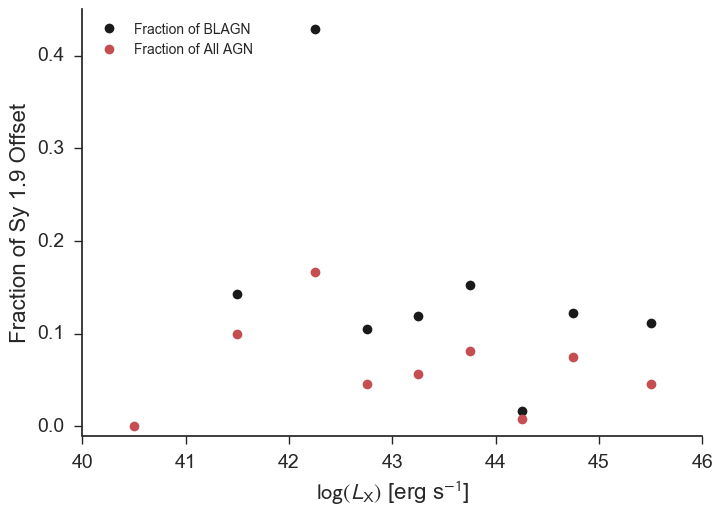

In [23]:
# Plot the fraction of offset sources
fig = plt.figure()
ax = fig.add_subplot(111)

bin_centers = (lx_bins[1:]+lx_bins[0:-1])/2.

ax.plot(bin_centers, n_sy1_9/n_broad, 'ko')
ax.plot(bin_centers, n_sy1_9/n_total, 'ro')
ax.set_xlabel(r'$\log(L_{\rm X})$ [erg s$^{-1}$]')
ax.set_ylabel('Fraction of Sy 1.9 Offset')
ax.set_ylim(-0.01, ax.get_ylim()[1])
ax.legend(['Fraction of BLAGN', 'Fraction of All AGN'], loc='upper left', fontsize=10)
sn.despine()
fig.savefig('../figures/frac_offsetSy1_9_vs_lx.pdf', bbox_inches='tight')

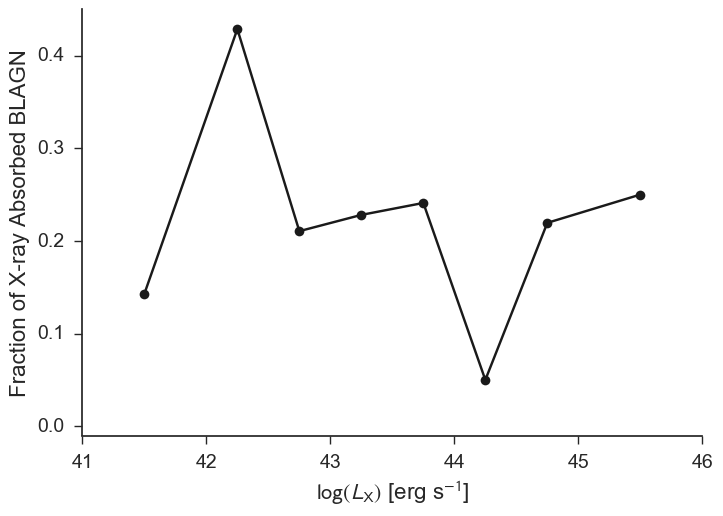

In [34]:
# Plot the fraction of X-ray absorbed BLAGN
fig = plt.figure()
ax = fig.add_subplot(111)

bin_centers = (lx_bins[1:]+lx_bins[0:-1])/2.

ax.plot(bin_centers, n_xray_abs/n_broad, 'ko-')
#ax.plot(bin_centers+0.1, n_sy1_9/n_broad, 'ro')
ax.set_xlabel(r'$\log(L_{\rm X})$ [erg s$^{-1}$]')
ax.set_ylabel('Fraction of X-ray Absorbed BLAGN')
ax.set_ylim(-0.01, ax.get_ylim()[1])
ax.set_xlim(41.0, 46.0)
#ax.legend(['Fraction of BLAGN', 'Fraction of All AGN'], loc='upper left', fontsize=10)
sn.despine()
fig.savefig('../figures/frac_blagn_xray_abs_vs_lx.pdf', bbox_inches='tight')